#**Appointment Scheduler for Sample Collection**
**Objective :** This project is to give a schedule for a diagnostic   center                agent for his sample collection from patient.   
**Method :** I used unsupervised learning to solve this problem.
            Under selected column names ,I used kmeans clustering under filtered Data and finally I sorted the cluster according to availability time of patient.

**Note :** Here each Agent is considered as particular cluster.

# dataset **preprocessing**

**1.loading the data**

In [ ]:
import pandas as pd
#df=pd.read_excel("/content/final_data.xlsx")
#from pyodide.http import open_url
#url = open_url("https://raw.githubusercontent.com//asaikiran1999/diagnostic-center-agents-sheduling/main/final_data.csv")
df = pd.read_csv("https://raw.githubusercontent.com//asaikiran1999/diagnostic-center-agents-sheduling/main/final_data.csv")

**2.checking the data info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1304 non-null   int64  
 1   Patient ID                                    1304 non-null   object 
 2   Agent ID                                      1304 non-null   int64  
 3   pincode                                       1304 non-null   object 
 4   patient location                              1304 non-null   object 
 5   Latitudes and Longitudes (Patient)            1304 non-null   object 
 6   Latitudes and Longitudes (Agent)              1304 non-null   object 
 7   Latitudes and Longitudes (Diagnostic Center)  1304 non-null   object 
 8   Diagnostic Centers                            1304 non-null   object 
 9   Time slot                                     1304 non-null   o

**3.checking for null values**

In [ ]:
df.isnull().sum()

Unnamed: 0                                      0
Patient ID                                      0
Agent ID                                        0
pincode                                         0
patient location                                0
Latitudes and Longitudes (Patient)              0
Latitudes and Longitudes (Agent)                0
Latitudes and Longitudes (Diagnostic Center)    0
Diagnostic Centers                              0
Time slot                                       0
shortest distance Agent-Pathlab(m)              0
shortest distance Patient-Pathlab(m)            0
shortest distance Patient-Agent(m)              0
Availabilty time (Patient)                      0
Age                                             0
Gender                                          0
Test Booking Date                               0
Test Booking Time HH:MM                         0
Test name                                       0
Sample                                          0


**4.checking for duplicates**

In [ ]:
df.duplicated().sum()

0

**5.Assigning numbers to column names**

In [ ]:
j=0
for i in df.columns :
  print(i+"-"+str(j))
  j=j+1

Unnamed: 0-0
Patient ID-1
Agent ID-2
pincode-3
patient location-4
Latitudes and Longitudes (Patient)-5
Latitudes and Longitudes (Agent)-6
Latitudes and Longitudes (Diagnostic Center)-7
Diagnostic Centers-8
Time slot-9
shortest distance Agent-Pathlab(m)-10
shortest distance Patient-Pathlab(m)-11
shortest distance Patient-Agent(m)-12
Availabilty time (Patient)-13
Age-14
Gender-15
Test Booking Date-16
Test Booking Time HH:MM-17
Test name-18
Sample-19
Way Of Storage Of Sample-20
Sample Collection Date-21
 Time For Sample Collection MM-22
Time Agent-Pathlab sec-23
Agent Arrival Time (range) HH:MM-24
Exact Arrival Time MM-25


removing useless columns

**6.Droping the unwanted columns**

In [ ]:
df1 = df.drop(df.columns[[0,2,3,6,7,9,10,12,22,23,24,25]], axis = 1)
df2=df1
df1.head()

,Patient ID,patient location,Latitudes and Longitudes (Patient),Diagnostic Centers,shortest distance Patient-Pathlab(m),Availabilty time (Patient),Age,Gender,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date
0,MD1001,Serilingampalle (M),"17.480944, 78.321500",Medquest Diagnostics Center,2840,09:00 to 10:00,37,Female,2022-01-01 00:00:00,12:04:00,Vitamin B-12,Blood,Vaccum blood collection tube,2022-01-02 00:00:00
1,MD1002,Serilingampalle (M),"17.482750, 78.340586",Medquest Diagnostics Center,1378,19:00 to 20:00,29,Male,2022-01-02 00:00:00,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03 00:00:00
2,MD1003,Ramachandrapuram,"17.518403, 78.310165",Medquest Diagnostics Center,4458,14:00 to 15:00,33,Male,2022-01-03 00:00:00,12:24:00,CBC,Blood,Vaccum blood collection tube,2022-01-04 00:00:00
3,MD1004,Miyapur,"17.511200, 78.357393",Medquest Diagnostics Center,2316,21:00 to 22:00,62,Female,2022-01-04 00:00:00,13:38:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-01-05 00:00:00
4,MD1005,Nizampet,"17.503342, 78.384344",Medquest Diagnostics Center,4377,13:00 to 14:00,80,Male,2022-01-05 00:00:00,16:01:00,TSH,Blood,Vaccum blood collection tube,2022-01-06 00:00:00


#Dataset **filtering**

1.**Taking date of sheeduling and filtering all datapoints related to that date.**

In [ ]:
x = input('enter the date of sheduling : ') 

enter the date of sheduling : 2022-01-03 00:00:00


In [ ]:
df3=df1[df1['Sample Collection Date']==x]
df4=df3.copy()
df4.head()

,Patient ID,patient location,Latitudes and Longitudes (Patient),Diagnostic Centers,shortest distance Patient-Pathlab(m),Availabilty time (Patient),Age,Gender,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date
1,MD1002,Serilingampalle (M),"17.482750, 78.340586",Medquest Diagnostics Center,1378,19:00 to 20:00,29,Male,2022-01-02 00:00:00,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03 00:00:00
31,DD1002,Pocharam,"17.194173, 78.599106",Diamond Diagnostic Center,28682,19:00 to 20:00,30,Female,2022-02-01 00:00:00,13:05:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00
61,AD1007,Vasanth Nagar,"17.494571, 78.384518",Apollo Diagnostics,5035,06:00 to 07:00,37,Female,2022-03-03 00:00:00,17:05:00,Fasting blood sugar,Blood,Vaccum blood collection tube,2022-01-03 00:00:00
91,PDC1007,Manikonda Jagir,"17.421293, 78.382893",Pronto Diagnostics Center,366,14:00 to 15:00,13,Male,2022-04-02 00:00:00,14:03:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00
121,MFD1014,HITEC City,"17.447756, 78.371468",Medifine Diagnostic Center,4773,20:00 to 21:00,67,Female,2022-05-02 00:00:00,10,Lipid Profile,Blood,Vaccum blood collection tube,2022-01-03 00:00:00


In [ ]:
df3.shape

(44, 14)

2.**taking no of agents available and clustering based on number of agents**

In [ ]:
y = int(input('enter the number of agents (should be less than '+str(round(df3.shape[0]/2))+') : '))

enter the number of agents (should be less than 22) : 4


3.**label Encoding of categorical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df3['patient location'] = le.fit_transform(df3['patient location'])
df3['Diagnostic Centers'] = le.fit_transform(df3['Diagnostic Centers'])
df3['Availabilty time (Patient)'] = le.fit_transform(df3['Availabilty time (Patient)'])
df3.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Patient ID,patient location,Latitudes and Longitudes (Patient),Diagnostic Centers,shortest distance Patient-Pathlab(m),Availabilty time (Patient),Age,Gender,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date
1,MD1002,28,"17.482750, 78.340586",4,1378,11,29,Male,2022-01-02 00:00:00,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03 00:00:00
31,DD1002,23,"17.194173, 78.599106",1,28682,11,30,Female,2022-02-01 00:00:00,13:05:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00
61,AD1007,29,"17.494571, 78.384518",0,5035,0,37,Female,2022-03-03 00:00:00,17:05:00,Fasting blood sugar,Blood,Vaccum blood collection tube,2022-01-03 00:00:00
91,PDC1007,20,"17.421293, 78.382893",5,366,7,13,Male,2022-04-02 00:00:00,14:03:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00
121,MFD1014,9,"17.447756, 78.371468",3,4773,12,67,Female,2022-05-02 00:00:00,10,Lipid Profile,Blood,Vaccum blood collection tube,2022-01-03 00:00:00


4.**taking only wanted columns for clustering**

In [ ]:
X =df3[['patient location','Diagnostic Centers','shortest distance Patient-Pathlab(m)','Availabilty time (Patient)']]
X.head()

,patient location,Diagnostic Centers,shortest distance Patient-Pathlab(m),Availabilty time (Patient)
1,28,4,1378,11
31,23,1,28682,11
61,29,0,5035,0
91,20,5,366,7
121,9,3,4773,12


5.**standardizing the numberical data using min-max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X=pd.DataFrame(scaled)
X.columns=['patient location','Diagnostic Centers','shortest distance Patient-Pathlab(m)','Availabilty time (Patient)']
X.head() 

,patient location,Diagnostic Centers,shortest distance Patient-Pathlab(m),Availabilty time (Patient)
0,0.933333,0.444444,0.046015,0.846154
1,0.766667,0.111111,1.000000,0.846154
2,0.966667,0.000000,0.173788,0.000000
3,0.666667,0.555556,0.010657,0.538462
4,0.300000,0.333333,0.164634,0.923077


# Clustered **sheduling**

1.**clustering the data based on selected columns**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=y,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_
df3["Agent id "]=labels
df4["Agent id "]=labels
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Patient ID,patient location,Latitudes and Longitudes (Patient),Diagnostic Centers,shortest distance Patient-Pathlab(m),Availabilty time (Patient),Age,Gender,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Agent id
1,MD1002,28,"17.482750, 78.340586",4,1378,11,29,Male,2022-01-02 00:00:00,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
31,DD1002,23,"17.194173, 78.599106",1,28682,11,30,Female,2022-02-01 00:00:00,13:05:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
61,AD1007,29,"17.494571, 78.384518",0,5035,0,37,Female,2022-03-03 00:00:00,17:05:00,Fasting blood sugar,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,0
91,PDC1007,20,"17.421293, 78.382893",5,366,7,13,Male,2022-04-02 00:00:00,14:03:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
121,MFD1014,9,"17.447756, 78.371468",3,4773,12,67,Female,2022-05-02 00:00:00,10,Lipid Profile,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,3


2.**clustering completed and steps for sorting the rows according to agent requirements**

In [ ]:
z = int(input("enter the agentid : "))

enter the agentid : 2


3.**re-indexing the collected data**

In [ ]:
df5 = df4[df4['Agent id ']==z]
df5.index = range(df5.shape[0])
df5

,Patient ID,patient location,Latitudes and Longitudes (Patient),Diagnostic Centers,shortest distance Patient-Pathlab(m),Availabilty time (Patient),Age,Gender,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Agent id
0,MD1002,Serilingampalle (M),"17.482750, 78.340586",Medquest Diagnostics Center,1378,19:00 to 20:00,29,Male,2022-01-02 00:00:00,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
1,DD1002,Pocharam,"17.194173, 78.599106",Diamond Diagnostic Center,28682,19:00 to 20:00,30,Female,2022-02-01 00:00:00,13:05:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
2,PDC1007,Manikonda Jagir,"17.421293, 78.382893",Pronto Diagnostics Center,366,14:00 to 15:00,13,Male,2022-04-02 00:00:00,14:03:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
3,DD1020,Rai Durg,"17.436792725635314, 78.50394339723873",Diamond Diagnostic Center,61,18:00 to 19:00,82,Female,2022-01-14 00:00:00,12,H1N1,Swab,Disposable plastic container,2022-01-03 00:00:00,2
4,PDC1034,Nanakaramguda,"17.421054, 78.344442",Pronto Diagnostics Center,3824,17:00 to 18:00,1,Male,2022-05-14 00:00:00,12:04:00,Complete Urinalysis,Urine,Urine culture transport tube,2022-01-03 00:00:00,2
5,PDC1042,Nanakaramguda,"17.40869984163653, 78.34196641438888",Pronto Diagnostics Center,4399,21:00 to 22:00,49,Female,2022-03-27 00:00:00,8,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
6,MD1053,Madhapur,"17.455232, 78.390787",Medquest Diagnostics Center,6618,19:00 to 20:00,71,Female,2022-02-07 00:00:00,10,HbA1c,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
7,MFD1062,Kukatpally,"17.489568425649196, 78.38969302153855",Medifine Diagnostic Center,308,21:00 to 22:00,70,Male,2022-03-09 00:00:00,14:02:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
8,LMD1096,Rail Nilayam,"17.423346, 78.428958",Lucid Medical Diagnostics,6973,19:00 to 20:00,54,Male,2022-06-01 00:00:00,16,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
9,MD1069,Miyapur,"17.496394, 78.340124",Medquest Diagnostics Center,440,14:00 to 15:00,73,Female,2022-01-26 00:00:00,19,Lipid Profile,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2


4.**creating the new column to sort according to available time**

In [ ]:
t = df5.shape[0]
df5['avail']=0
for i in range(t):
  df5["avail"][i]=int(df5['Availabilty time (Patient)'][i].split('to')[0].strip().split(':')[0])

df5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Patient ID,patient location,Latitudes and Longitudes (Patient),Diagnostic Centers,shortest distance Patient-Pathlab(m),Availabilty time (Patient),Age,Gender,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Agent id,avail
0,MD1002,Serilingampalle (M),"17.482750, 78.340586",Medquest Diagnostics Center,1378,19:00 to 20:00,29,Male,2022-01-02 00:00:00,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2,19
1,DD1002,Pocharam,"17.194173, 78.599106",Diamond Diagnostic Center,28682,19:00 to 20:00,30,Female,2022-02-01 00:00:00,13:05:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2,19
2,PDC1007,Manikonda Jagir,"17.421293, 78.382893",Pronto Diagnostics Center,366,14:00 to 15:00,13,Male,2022-04-02 00:00:00,14:03:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2,14
3,DD1020,Rai Durg,"17.436792725635314, 78.50394339723873",Diamond Diagnostic Center,61,18:00 to 19:00,82,Female,2022-01-14 00:00:00,12,H1N1,Swab,Disposable plastic container,2022-01-03 00:00:00,2,18
4,PDC1034,Nanakaramguda,"17.421054, 78.344442",Pronto Diagnostics Center,3824,17:00 to 18:00,1,Male,2022-05-14 00:00:00,12:04:00,Complete Urinalysis,Urine,Urine culture transport tube,2022-01-03 00:00:00,2,17
5,PDC1042,Nanakaramguda,"17.40869984163653, 78.34196641438888",Pronto Diagnostics Center,4399,21:00 to 22:00,49,Female,2022-03-27 00:00:00,8,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2,21
6,MD1053,Madhapur,"17.455232, 78.390787",Medquest Diagnostics Center,6618,19:00 to 20:00,71,Female,2022-02-07 00:00:00,10,HbA1c,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2,19
7,MFD1062,Kukatpally,"17.489568425649196, 78.38969302153855",Medifine Diagnostic Center,308,21:00 to 22:00,70,Male,2022-03-09 00:00:00,14:02:00,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2,21
8,LMD1096,Rail Nilayam,"17.423346, 78.428958",Lucid Medical Diagnostics,6973,19:00 to 20:00,54,Male,2022-06-01 00:00:00,16,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2,19
9,MD1069,Miyapur,"17.496394, 78.340124",Medquest Diagnostics Center,440,14:00 to 15:00,73,Female,2022-01-26 00:00:00,19,Lipid Profile,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2,14


5.**sorting the agent data according to available time and then according to shartest distance.**

In [ ]:
df6 = df5.sort_values(['avail', 'shortest distance Patient-Pathlab(m)'],ascending=[1,1])

In [ ]:
df7 = df6.drop(['avail','Test Booking Time HH:MM','Test Booking Date'], axis = 1)
df7.head()

,Patient ID,patient location,Latitudes and Longitudes (Patient),Diagnostic Centers,shortest distance Patient-Pathlab(m),Availabilty time (Patient),Age,Gender,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Agent id
2,PDC1007,Manikonda Jagir,"17.421293, 78.382893",Pronto Diagnostics Center,366,14:00 to 15:00,13,Male,TSH,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
9,MD1069,Miyapur,"17.496394, 78.340124",Medquest Diagnostics Center,440,14:00 to 15:00,73,Female,Lipid Profile,Blood,Vaccum blood collection tube,2022-01-03 00:00:00,2
10,PDC1110,Manikonda Jagir,"17.420228, 78.381133",Pronto Diagnostics Center,433,17:00 to 18:00,67,Female,RTPCR,Swab,Disposable plastic container,2022-01-03 00:00:00,2
4,PDC1034,Nanakaramguda,"17.421054, 78.344442",Pronto Diagnostics Center,3824,17:00 to 18:00,1,Male,Complete Urinalysis,Urine,Urine culture transport tube,2022-01-03 00:00:00,2
3,DD1020,Rai Durg,"17.436792725635314, 78.50394339723873",Diamond Diagnostic Center,61,18:00 to 19:00,82,Female,H1N1,Swab,Disposable plastic container,2022-01-03 00:00:00,2


5.changing the **Availabilty time (Patient)** as first column

##**This is the final patient schedule of agents to collect the sample.**##  

In [ ]:
first_column = df7.pop('Availabilty time (Patient)')
df7.insert(0, 'Availabilty time (Patient)', first_column)
df7 = df7.drop(['shortest distance Patient-Pathlab(m)','Sample Collection Date'  ],axis=1)
df7 = df7.drop(df7.columns[[10]], axis = 1)
df7.head()

,Availabilty time (Patient),Patient ID,patient location,Latitudes and Longitudes (Patient),Diagnostic Centers,Age,Gender,Test name,Sample,Way Of Storage Of Sample
2,14:00 to 15:00,PDC1007,Manikonda Jagir,"17.421293, 78.382893",Pronto Diagnostics Center,13,Male,TSH,Blood,Vaccum blood collection tube
9,14:00 to 15:00,MD1069,Miyapur,"17.496394, 78.340124",Medquest Diagnostics Center,73,Female,Lipid Profile,Blood,Vaccum blood collection tube
10,17:00 to 18:00,PDC1110,Manikonda Jagir,"17.420228, 78.381133",Pronto Diagnostics Center,67,Female,RTPCR,Swab,Disposable plastic container
4,17:00 to 18:00,PDC1034,Nanakaramguda,"17.421054, 78.344442",Pronto Diagnostics Center,1,Male,Complete Urinalysis,Urine,Urine culture transport tube
3,18:00 to 19:00,DD1020,Rai Durg,"17.436792725635314, 78.50394339723873",Diamond Diagnostic Center,82,Female,H1N1,Swab,Disposable plastic container


# **Deployment output**
**Steps to follow**

1.Enter the date only the January month of 2022
2.Enter the availabilty of patients (better enter the number less than six)
3.if number of agents is n ,the agent id will be between (0 - n-1)

[**click here**](https://appointmentschedulermed.herokuapp.com/) to see my deployed project.

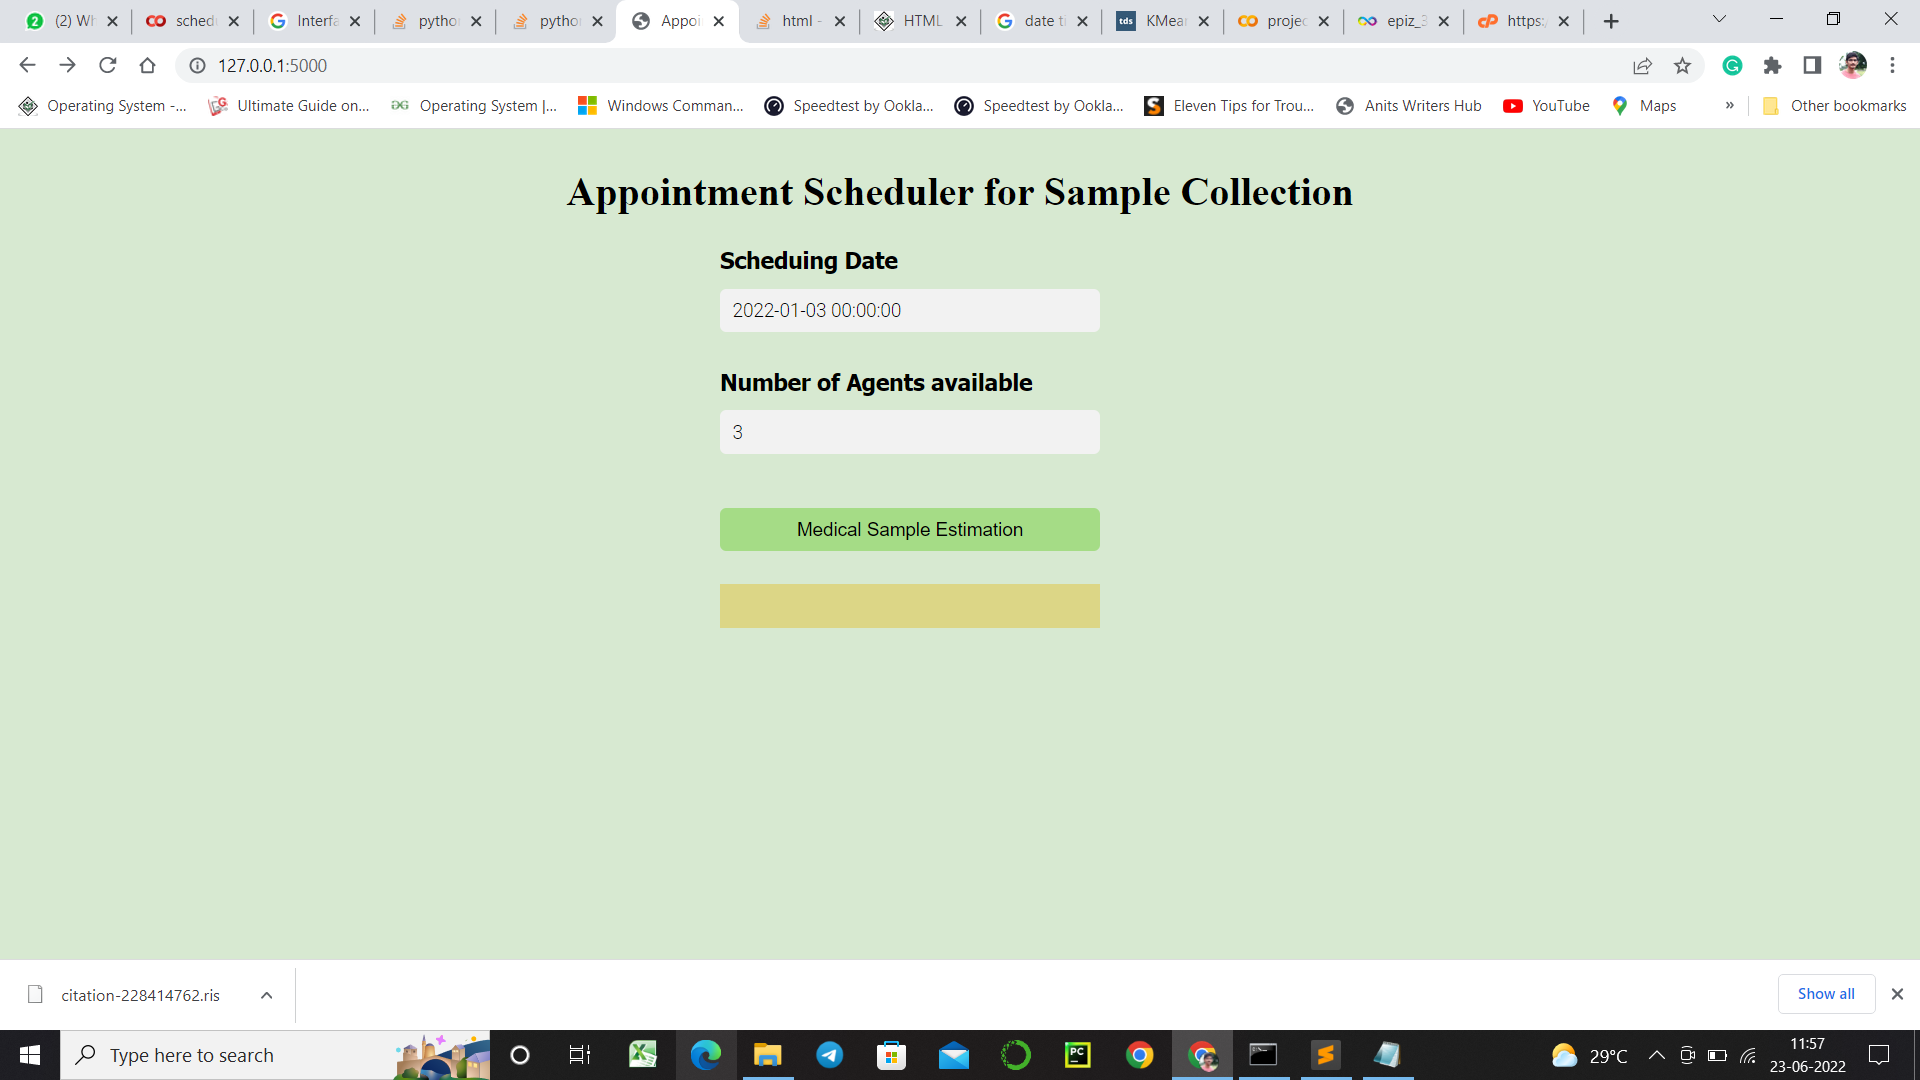

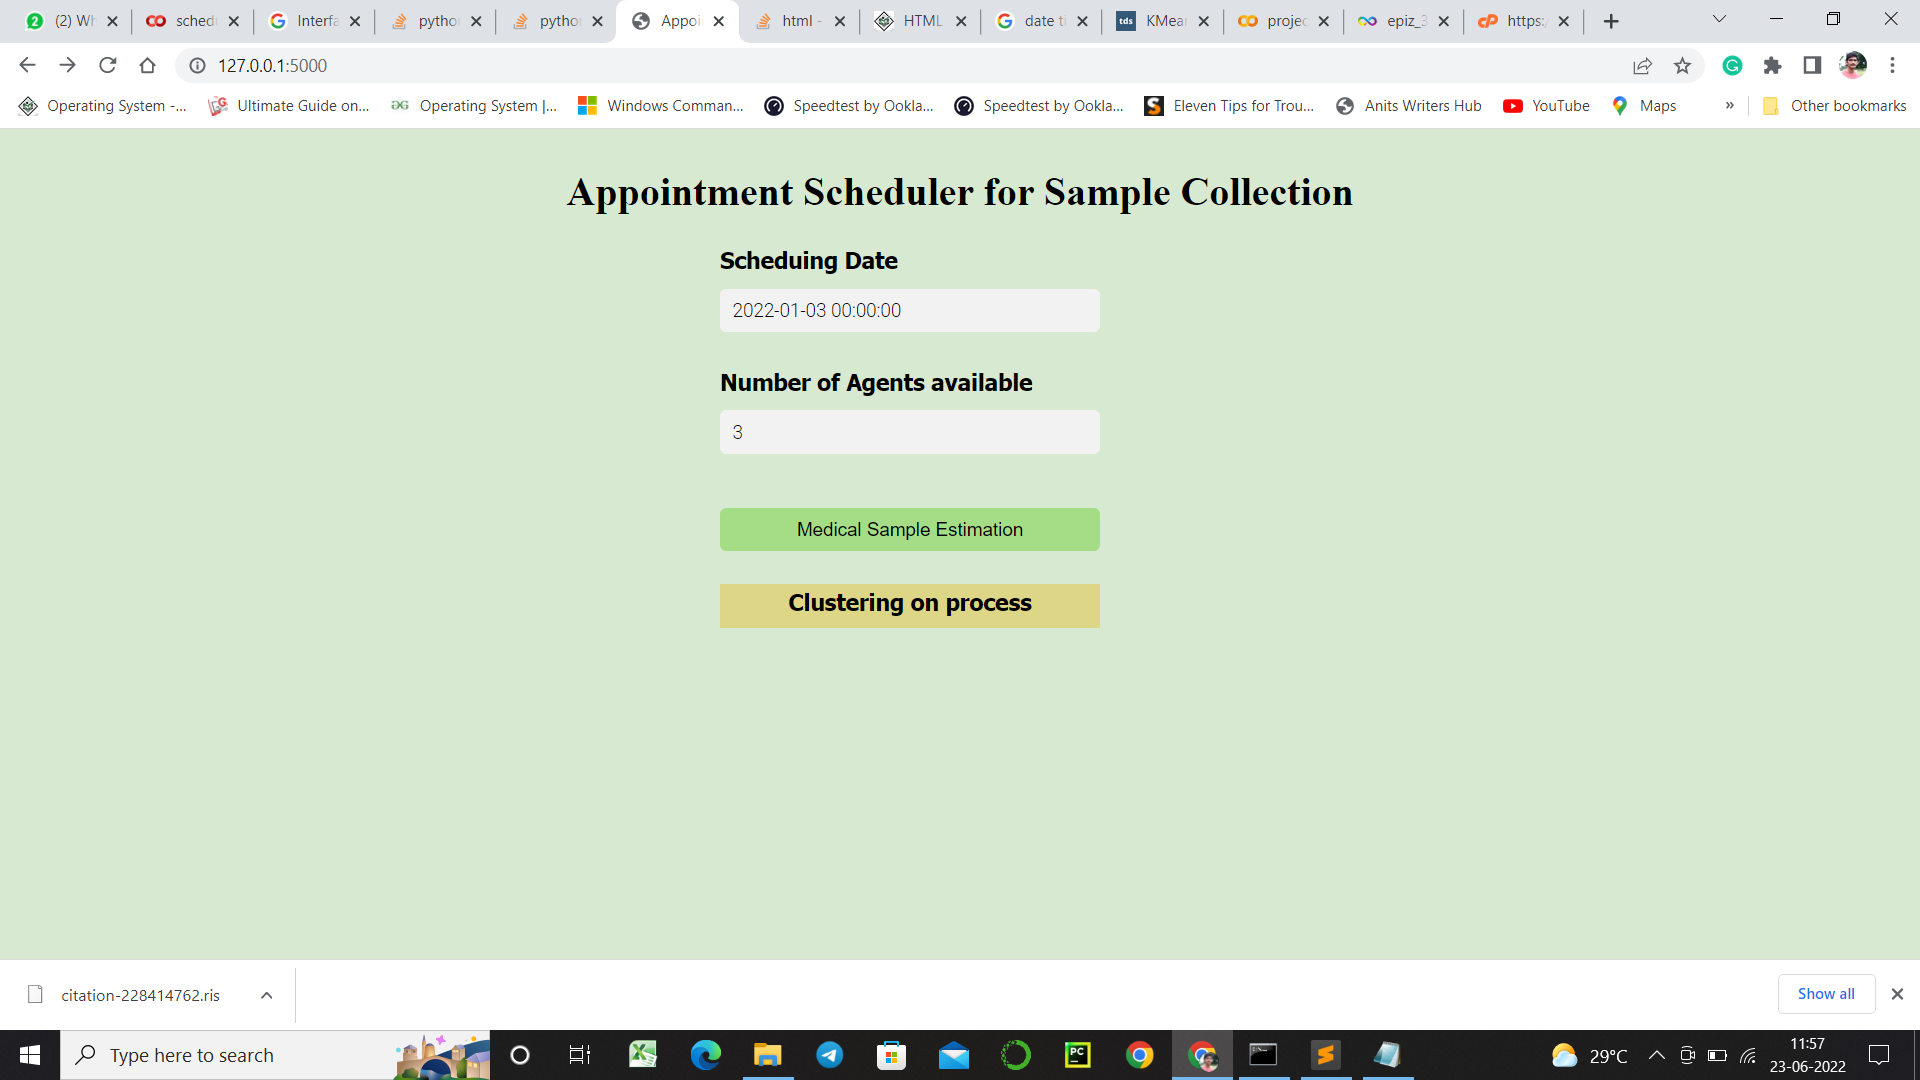

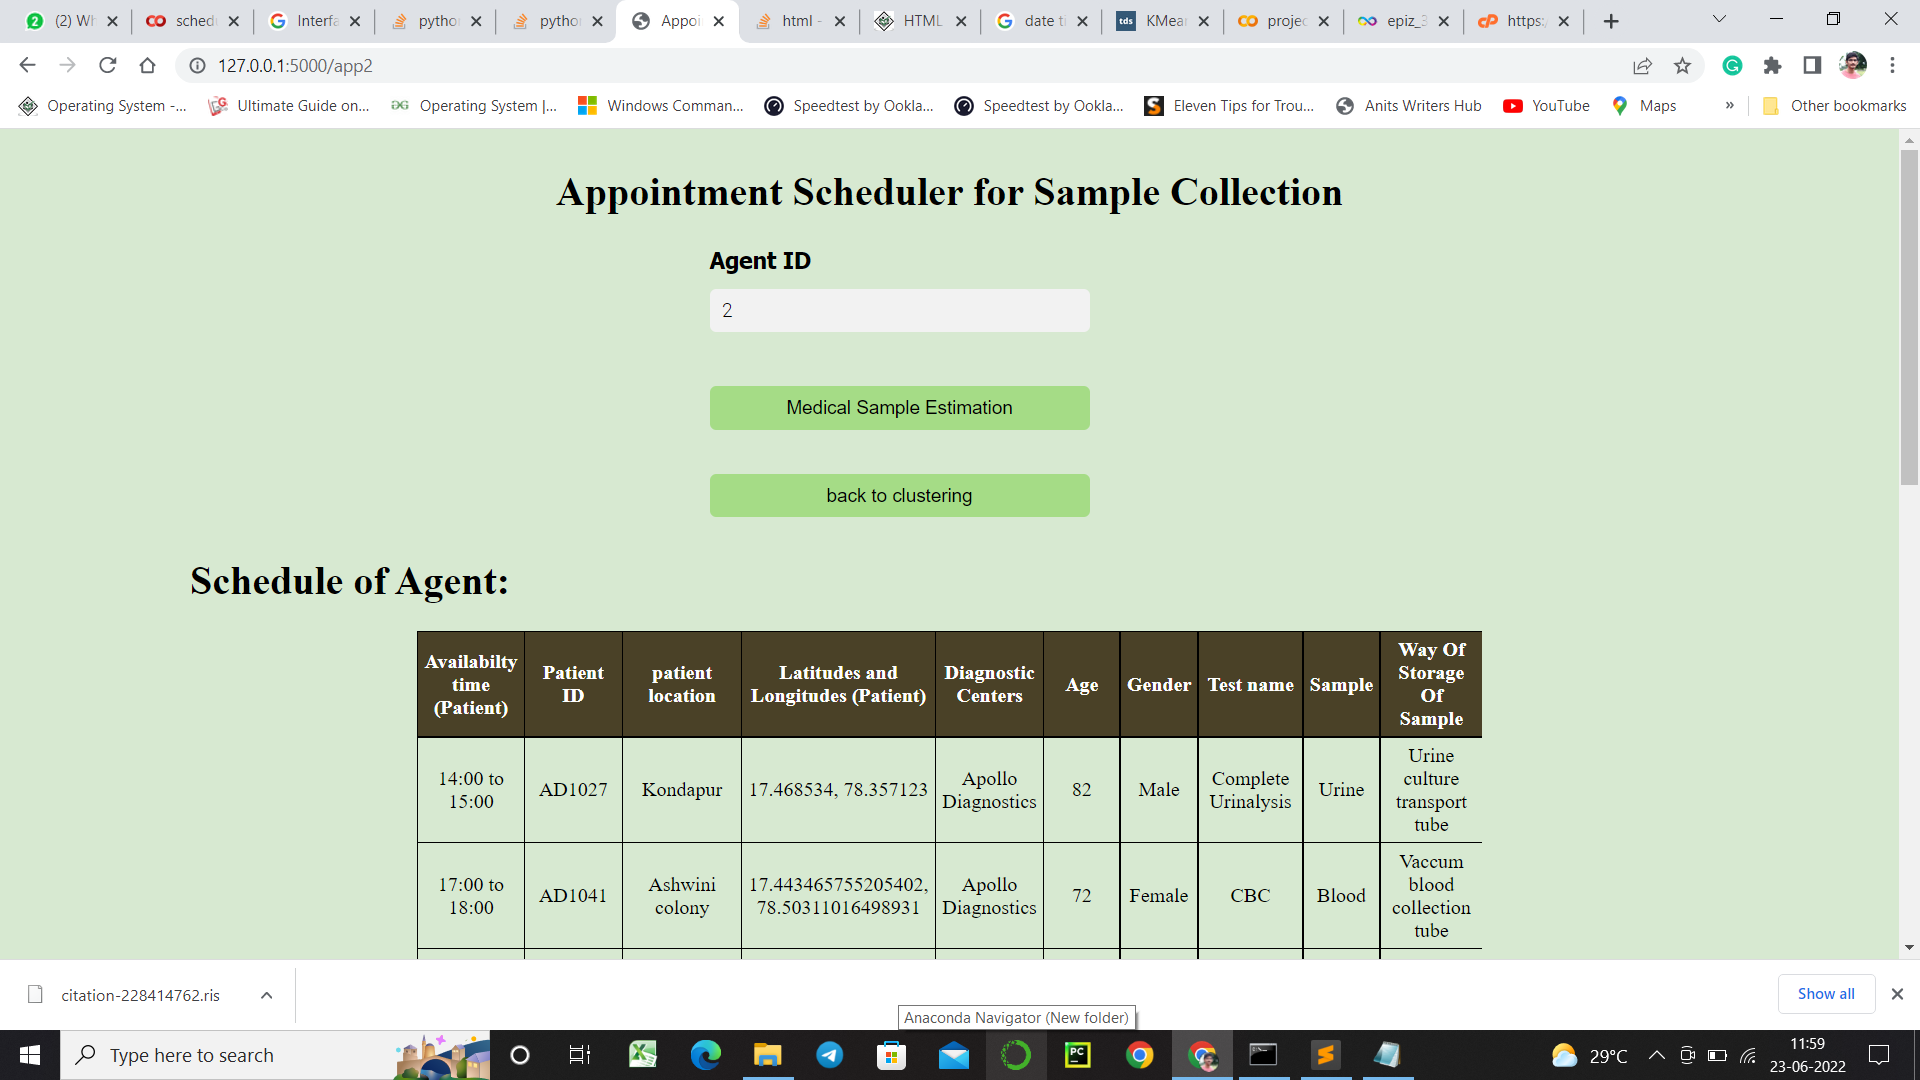